In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Reading the regional portraits

In [2]:
df = pd.read_excel(os.path.join("data", "source", "je-e-21.03.01.xlsx"), header = 5, skipfooter=21)
df.drop(range(0,3), inplace=True) # drop some filler rows between header and data
df.columns

Index(['Number of commune', 'Name of commune', 'Residents', 'Change in %',
       'Population density per km²', 'Foreign nationals in %', '0-19 years',
       '20-64 years', '65 years or over', 'Crude marriage rate',
       'Crude divorce rate', 'Crude birth rate', 'Crude mortality rate',
       'Private households', 'Size of households in persons',
       'Total surface area in km2', 'Settlement and urban area in %',
       'Change in ha', 'Agricultural area in %', 'Change in ha.1',
       'Wooded area in %', 'Unproductive area in %', 'Employed total',
       'Primary sector', 'Secondary sector', 'Tertiary sector',
       'Business establishments total', 'Primary sector.1',
       'Secondary sector.1', 'Tertiary sector.1', 'Dwelling vacancy rate',
       'New housing units per 1000 residents', 'Social assistance rate 3)',
       'FDP/PLR 4)', 'CVP', 'SP', 'SVP', 'EVP/CSP', 'GLP', 'BDP', 'PdA/Sol.',
       'GPS', 'Small right-wing parties'],
      dtype='object')

In [3]:
# use easily readable and consistent column names
new_cols = ['commune_id', 'name', 'residents', 'population_change',
       'population_density', 'foreign_nationals_percent', 'age_0_19',
       'age_20_64', 'age_65_over', 'marriage_rate',
       'divorce_rate', 'birth_rate', 'mortality_rate',
       'households', 'households_size',
       'surface_area', 'settlement_urban_area_percent',
       'settlement_urban_area_change', 'agricultural_area_percent', 'agricultural_area_change',
       'wooded_area_percent', 'unproductive_area_percent', 'employed_total',
       'employed_primary_sector', 'employed_secondary_sector', 'employed_tertiary_sector',
       'workplaces_total', 'workplaces_primary_sector',
       'workplaces_secondary_sector', 'workplaces_tertiary_sector', 'dwelling_vacancy_rate',
       'new_housing_rate', 'social_assistance_rate',
       'vote_share_fdp', 'vote_share_cvp', 'vote_share_sp', 'vote_share_svp', 'vote_share_evp', 'vote_share_glp', 'vote_share_bdp', 'vote_share_pda',
       'vote_share_gps', 'vote_share_rightwing']
df.columns = new_cols
df.set_index("commune_id", inplace=True)
df.head(3) # first should be "Aeugst am Albis"

,name,residents,population_change,population_density,foreign_nationals_percent,age_0_19,age_20_64,age_65_over,marriage_rate,divorce_rate,...,vote_share_fdp,vote_share_cvp,vote_share_sp,vote_share_svp,vote_share_evp,vote_share_glp,vote_share_bdp,vote_share_pda,vote_share_gps,vote_share_rightwing
commune_id,,,,,,,,,,,,,,,,,,,,,
1.0,Aeugst am Albis,1982.0,8.66228,250.568900,13.874874,19.677094,62.764884,17.558022,4.588325,2.039256,...,16.421,2.49797,11.5651,30.381,3.22747,14.3173,1.26372,0.16211,15.0505,3.82065
2.0,Affoltern am Albis,12229.0,10.2606,1154.768650,28.628670,20.508627,61.329626,18.161747,4.676923,2.133333,...,13.3854,4.53534,14.6453,30.3069,6.61856,12.6666,2.00145,0.198718,12.5906,1.55552
3.0,Bonstetten,5548.0,7.54022,746.702557,16.005768,23.666186,60.310022,16.023792,4.159132,1.265823,...,15.355,3.86796,16.7429,26.1163,4.19402,16.2379,1.28403,0.176013,12.3685,1.38502


In [4]:
df.tail(3) # last should be "La Baroche"

,name,residents,population_change,population_density,foreign_nationals_percent,age_0_19,age_20_64,age_65_over,marriage_rate,divorce_rate,...,vote_share_fdp,vote_share_cvp,vote_share_sp,vote_share_svp,vote_share_evp,vote_share_glp,vote_share_bdp,vote_share_pda,vote_share_gps,vote_share_rightwing
commune_id,,,,,,,,,,,,,,,,,,,,,
6808.0,Clos du Doubs,1286.0,1.98255,20.825911,8.320373,18.895801,56.143079,24.961120,3.862495,1.544998,...,4.48239,33.2978,21.5582,14.301,10.2455,*,*,*,16.1153,*
6809.0,Haute-Ajoie,1095.0,-5.19481,26.752993,7.671233,18.264840,56.347032,25.388128,3.638017,1.819009,...,8.39002,37.8685,19.3878,18.7075,4.19501,*,*,*,11.4512,*
6810.0,La Baroche,1162.0,-2.27082,37.399421,6.282272,21.514630,54.905336,23.580034,1.710864,1.710864,...,13.7738,27.6596,16.3494,20.2688,9.18253,*,*,*,12.766,*


### Missing values

In [5]:
# social assistance rate X = keine Angabe aus Datenschutzgründen (weniger als 6 unterstützte Personen) (source: Wirtschaftliche Sozialhilfe, 
# 2018, 23820_131.xlsx)
# action: set to zero
df["social_assistance_rate"].replace(to_replace=["X"], value=0, inplace=True)

In [6]:
# employed/workplaces: X = keine Angabe aus Datenschutzgründen (Source: Beschäftigte in aktiven Unternehmen, 2017, 23811_131.xlsx)
# action: set to zero in *_sector, calculate *_total = sum(*_sectors)
for col in ["employed_primary_sector", "employed_secondary_sector", "employed_tertiary_sector",
           "workplaces_primary_sector", "workplaces_secondary_sector", "workplaces_tertiary_sector"]:
    df[col].replace(to_replace=["X"], value=0, inplace=True)

idx_emp = df["employed_total"] == "X"
df.loc[idx_emp, "employed_total"] = df[idx_emp][["employed_primary_sector", "employed_secondary_sector", "employed_tertiary_sector"]].sum(axis=1)
idx_wpl = df["workplaces_total"] == "X"
df.loc[idx_wpl, "workplaces_total"] = df[idx_wpl][["workplaces_primary_sector", "workplaces_secondary_sector", "workplaces_tertiary_sector"]].sum(axis=1)

In [7]:
# vote shares: * No candidate in this canton or communes
# action: set to zero
vote_share_cols = [col for col in df.columns if col.startswith("vote_share_")]
for col in vote_share_cols:
    df[col].replace(to_replace=["*"], value=0, inplace=True)

# add a column with the total; this is usually not 100%
df["vote_share_total"] = df[vote_share_cols].sum(axis=1)

df = df.apply(pd.to_numeric, errors='ignore')

### Vote shares and calculating politcal orientation (po-value)

In [8]:
# summary statistics of vote shares
# note that the means are from commune results, not the same as the overall vote share
df[vote_share_cols].describe().T.sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
vote_share_svp,2202.0,31.119614,13.488360,0.0,21.294265,30.341544,39.427220,84.105431
vote_share_fdp,2202.0,14.910235,9.186436,0.0,8.691143,13.812501,19.987613,69.692308
vote_share_sp,2202.0,13.638741,6.399754,0.0,9.183769,13.273311,17.677013,49.344641
vote_share_cvp,2202.0,12.679215,13.944716,0.0,2.307491,7.969123,18.394949,79.545455
vote_share_gps,2202.0,11.002648,6.116198,0.0,6.885733,9.991772,14.663547,38.378378
vote_share_glp,2202.0,6.231430,4.039270,0.0,3.346843,6.052427,8.848411,23.778071
vote_share_bdp,2202.0,2.872597,4.961953,0.0,0.000000,0.953592,3.242650,64.576401
vote_share_evp,2202.0,2.332562,2.660542,0.0,0.452074,1.608542,3.383755,30.373832
vote_share_rightwing,2202.0,2.206915,4.241104,0.0,0.000000,0.634048,2.231820,27.197640
vote_share_pda,2202.0,0.793020,2.104188,0.0,0.000000,0.000000,0.482805,33.280289


Now we calculate the po-value using the left/right values of the parties and their vote shares:

In [9]:
# print(vote_share_cols)
# same order of parties as in vote_share_cols is important
party_lr_dict = {"fdp": 1, "cvp": 0, "sp": -1, "svp": 2, "evp": 0, "glp": 0, "bdp": 1, "pda": -2, "gps": -2, "rightwing": 2 }
party_lr_array = np.array(list(party_lr_dict.values()))
df["po_value"] = np.dot(df[vote_share_cols].values, party_lr_array) / df["vote_share_total"]

# Bundesrat: 2 sp, 2 fdp, 2 svp, 1 cvp -> (-2 + 2 + 4 + 0) / 7 = 0.57
# overall Nationrat vote 2019 (manually calculated with values from top row of excel): 0.28

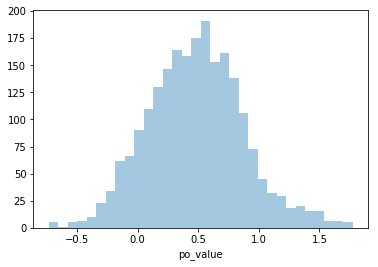

In [10]:
df["po_value"].fillna(0, inplace=True)
sns.distplot(df["po_value"], kde=False);
# looks very much like a normal distribution

In [11]:
# do we have correlation of some features with the po-value (ignore the vote shares)?
df.corr()["po_value"].sort_values()

# only weak correlations of some features (-foreign_nationals_percent, -population_density, +workplaces_primary_sector,
# -social_assistance_rate)

# why is fdp negatively correlated? very interesting question.

vote_share_gps                  -0.747547
vote_share_sp                   -0.634641
vote_share_pda                  -0.412025
foreign_nationals_percent       -0.299823
settlement_urban_area_percent   -0.276921
population_density              -0.270896
vote_share_fdp                  -0.246170
social_assistance_rate          -0.239157
employed_secondary_sector       -0.180381
residents                       -0.179507
workplaces_secondary_sector     -0.175218
households                      -0.174567
population_change               -0.156523
workplaces_tertiary_sector      -0.154730
employed_total                  -0.152847
workplaces_total                -0.151372
employed_tertiary_sector        -0.147637
settlement_urban_area_change    -0.126947
age_0_19                        -0.123269
vote_share_glp                  -0.098987
vote_share_cvp                  -0.093801
households_size                 -0.063086
divorce_rate                    -0.044000
birth_rate                      -0

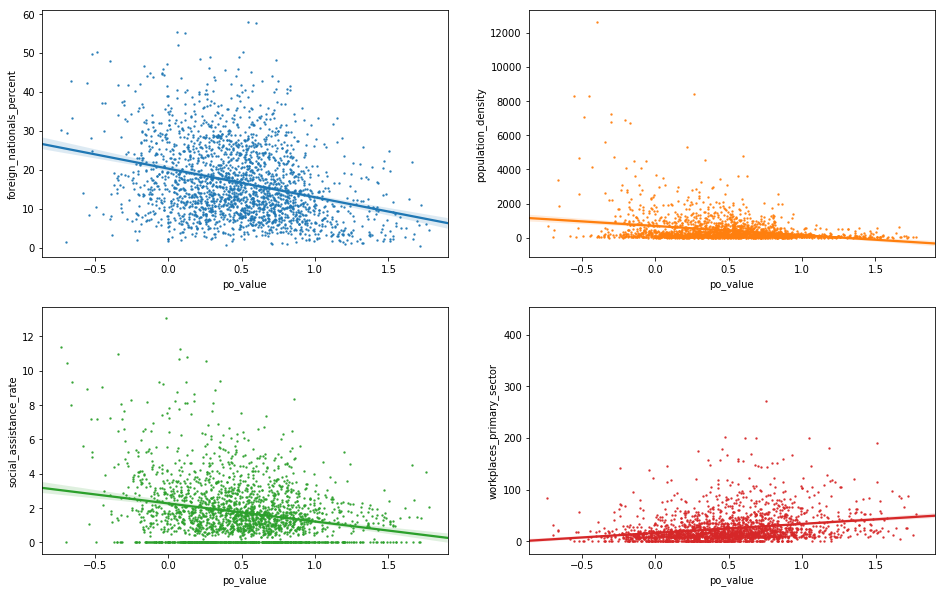

In [12]:
fig, axs = plt.subplots(2, 2, figsize = (16, 10))
sns.regplot(ax=axs[0, 0], data=df, x="po_value", y="foreign_nationals_percent", scatter_kws={'s':2})
sns.regplot(ax=axs[0, 1], data=df, x="po_value", y="population_density", scatter_kws={'s':2})
sns.regplot(ax=axs[1, 0], data=df, x="po_value", y="social_assistance_rate", scatter_kws={'s':2})
sns.regplot(ax=axs[1, 1], data=df, x="po_value", y="workplaces_primary_sector", scatter_kws={'s':2})
plt.show()

# you can see that some features have far outliers and that will have to be handled in some way (e.g. log-transformed, dropped)

### Preliminary EDA

In [13]:
df.describe([.25, .5, .75, .99]).T

,count,mean,std,min,25%,50%,75%,99%,max
residents,2202.0,3880.348320,12660.858120,11.000000,706.250000,1536.000000,3750.000000,30925.130000,415367.000000
population_change,2202.0,8.458505,10.456186,-28.521940,2.230569,7.246584,13.141421,42.302526,83.383992
population_density,2202.0,432.445211,785.005647,0.895037,79.978233,181.908252,461.479018,3628.103940,12669.052103
foreign_nationals_percent,2202.0,16.783392,9.688505,0.425532,9.475953,14.877374,22.884377,44.501672,58.093797
age_0_19,2202.0,20.585656,3.393323,0.000000,18.807332,20.646030,22.688613,28.054211,37.777778
age_20_64,2202.0,60.366464,3.347732,18.181818,58.428517,60.418491,62.352579,68.443673,77.922078
age_65_over,2202.0,19.047880,4.550985,6.271186,16.085914,18.666860,21.402374,32.361839,81.818182
marriage_rate,2202.0,4.294397,2.397795,0.000000,2.957213,4.325104,5.437572,11.581612,30.769231
divorce_rate,2202.0,1.867185,1.651556,0.000000,0.943230,1.711352,2.466066,7.781500,17.857143
birth_rate,2202.0,9.509809,3.907389,0.000000,7.306424,9.474422,11.450382,21.915785,35.714286


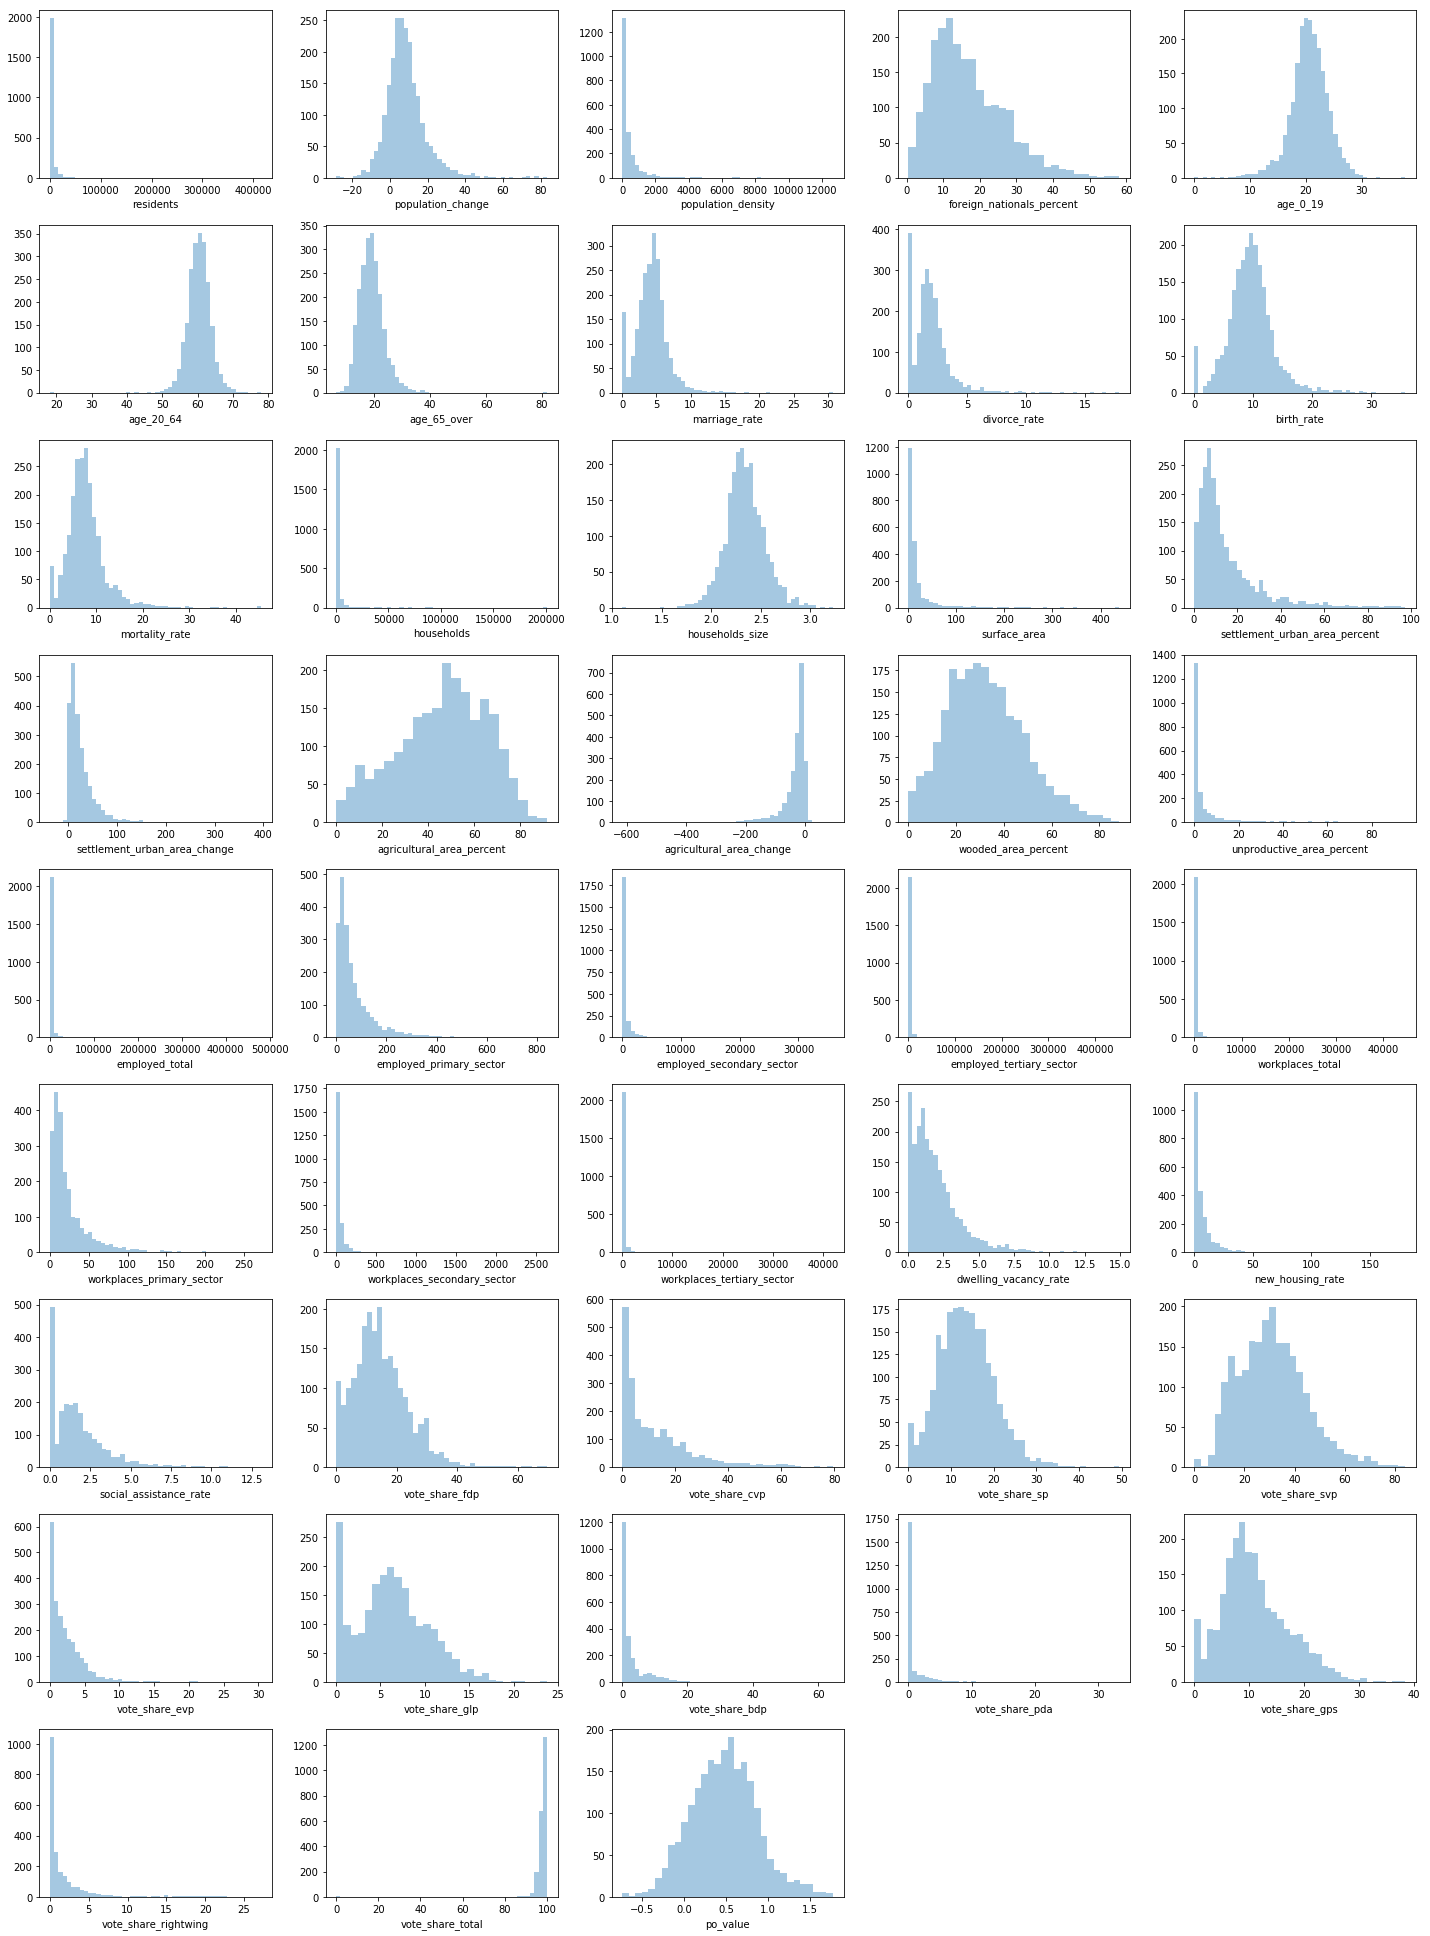

In [14]:
# plot the distributions of all features
cols = df.columns[1:]
fig, axs = plt.subplots(9, 5, figsize = (20, 27))
for i, ax in enumerate(axs.flatten()):
    if i < len(cols):
        sns.distplot(df[cols[i]], kde = False, ax = ax)
    else:
        ax.set_axis_off()
plt.tight_layout()

The number of residents is right-skewed with a very long right tail. With a 99th percentil at ~30'000 residents, there remain a few large cities, like Zürich with > 400'000. Several features are strongly related to residents and look similar, e.g. households, employees or workplaces.
Another feature that has a long right tail is the surface area.

In [15]:
df.to_csv(os.path.join("data", "processed", "regional_portraits.csv"))